In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, load_mpl_presets
import numpy as np
import math as m
import vice
import sys
load_mpl_presets()
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
name = "/Volumes/Elements/bimodality-outputs/twoinfall/post-process/tau1_1_tau2_4_onset_4_ratiotest"
# name = "../test"
output = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (output.name))
output.stars["abszfinal"] = [abs(row[-1]) for row in extra[:output.stars.size[0]]]

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_70228/2998738519.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


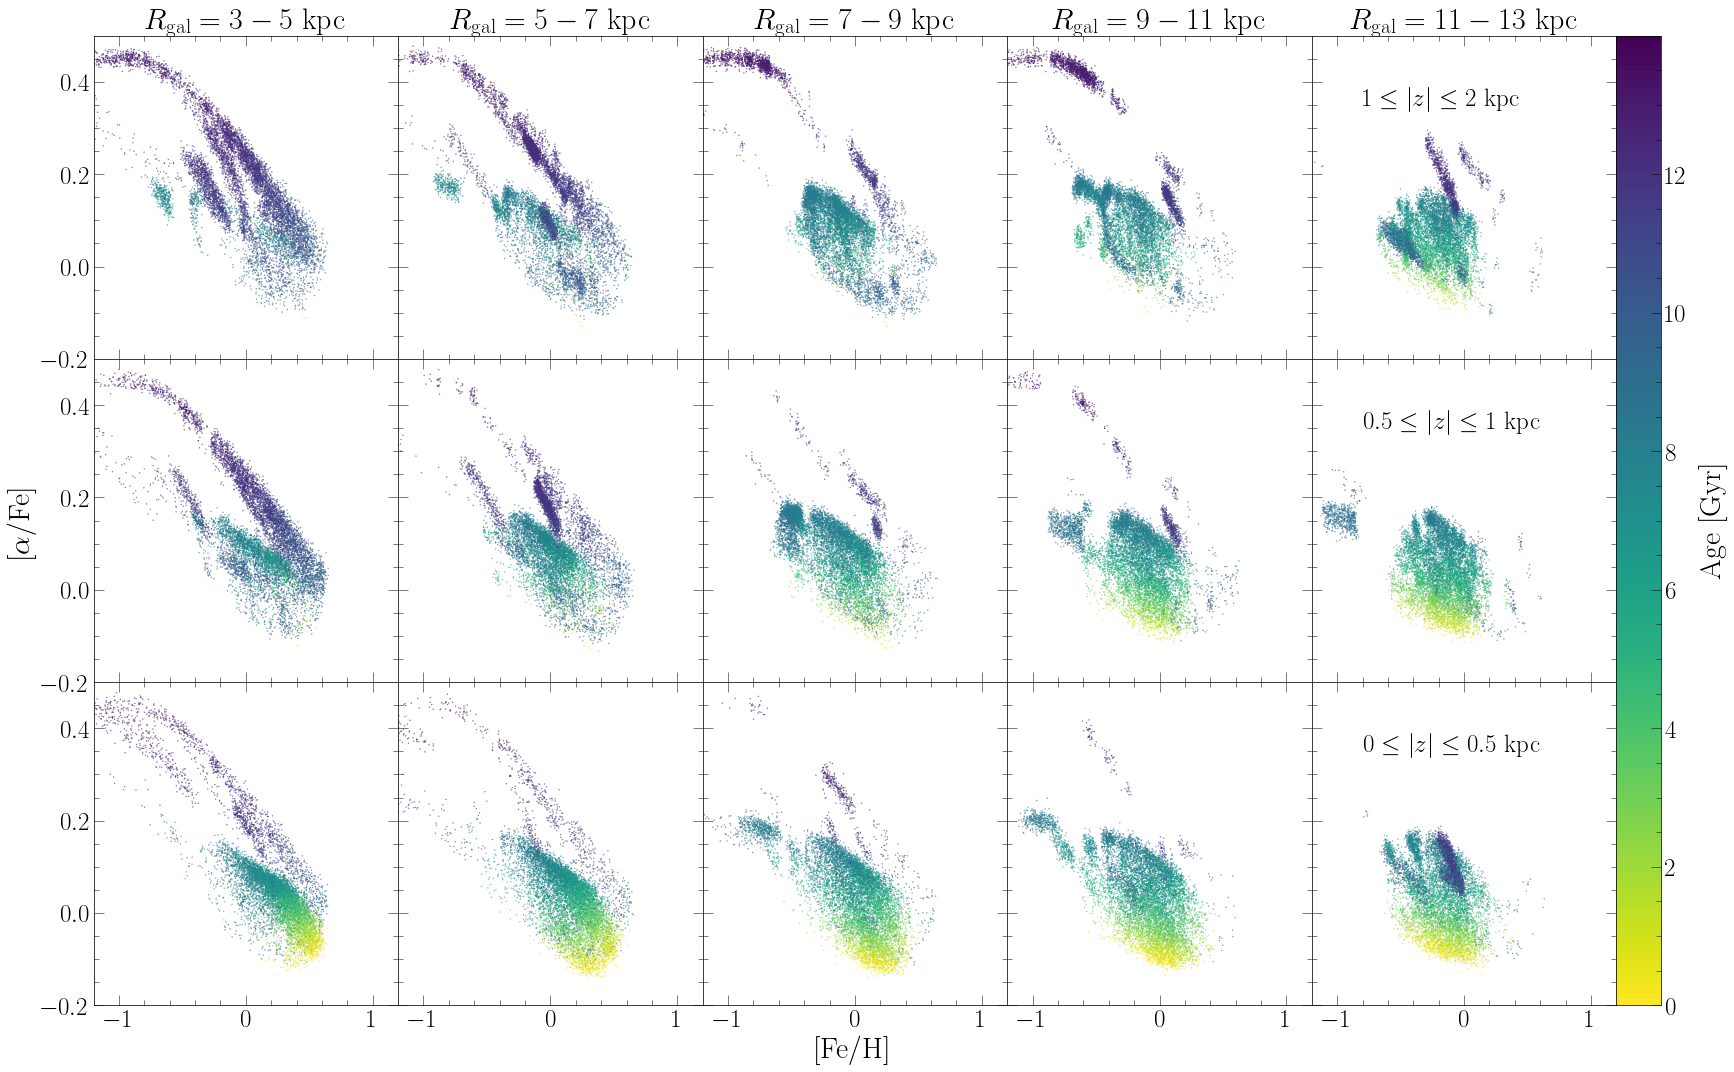

In [4]:
radbins = [[3, 5], [5, 7], [7, 9], [9, 11], [11, 13]]
zbins = [[1, 2], [0.5, 1], [0, 0.5]]
zonewidth = 0.1

fig, axes = plt.subplots(ncols = 5, nrows = 3, figsize = (25, 15))
axes[1][0].set_ylabel(r"[$\alpha$/Fe]", fontsize = 30)
axes[2][2].set_xlabel("[Fe/H]", fontsize = 30)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        if j: plt.setp(axes[i][j].get_yticklabels(), visible = False)
        axes[i][j].set_xlim([-1.2, 1.2])
        axes[i][j].set_ylim([-0.2, 0.5])
        axes[i][j].tick_params(which = "both", labelsize = 25)
        if not i: axes[i][j].set_title(
            r"$R_\text{gal} = %g - %g$ kpc" % (radbins[j][0], radbins[j][1]), fontsize = 30)
        if j == len(axes[i]) - 1: axes[i][j].text(-0.8, 0.35, r"$%g \leq \left|z\right| \leq %g$ kpc" % (
            zbins[i][0], zbins[i][1]), fontsize = 25)

for i in range(len(zbins)):
    for j in range(len(radbins)):
# for i in range(1):
#     for j in range(1):
        stars = output.stars.filter(
            "zone_final", ">=", radbins[j][0] // zonewidth).filter(
            "zone_final", "<=", radbins[j][1] // zonewidth).filter(
            "abszfinal", ">=", zbins[i][0]).filter(
            "abszfinal", "<=", zbins[i][1])
        np.random.seed(seed = 0)
        mtot = sum(stars["mass"])
        mass_fracs = [_ / mtot for _ in stars["mass"]]
        indeces = np.random.choice(list(range(len(stars["mass"]))), p = mass_fracs, size = 10000)
        xvals = [stars["[fe/h]"][_] for _ in indeces]
        yvals = [stars["[o/fe]"][_] for _ in indeces]
        age = [stars["age"][_] for _ in indeces]
        for k in range(len(xvals)):
            xvals[k] += np.random.normal(scale = 0.01)
            yvals[k] += np.random.normal(scale = 0.01)
        kwargs = {
            "c": age,
            "s": 0.1,
            "rasterized": True,
            "cmap": plt.get_cmap("viridis_r"),
            "vmin": 0,
            "vmax": 14
        }
        sc = axes[i][j].scatter(xvals, yvals, **kwargs)
        
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10, fontsize = 30)
cbar.set_ticks(range(0, 14, 2))
cbar.ax.tick_params(labelsize = 25)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0, right = 0.9)
cbar_ax.set_position([
    axes[-1][-1].get_position().x1,
    axes[-1][-1].get_position().y0,
    0.025,
    axes[0][-1].get_position().y1 - axes[-1][-1].get_position().y0
])
# for ext in ["pdf", "png"]: plt.savefig("./ofe_feh_densitymap/ratiotest.%s" % (ext))
plt.show()

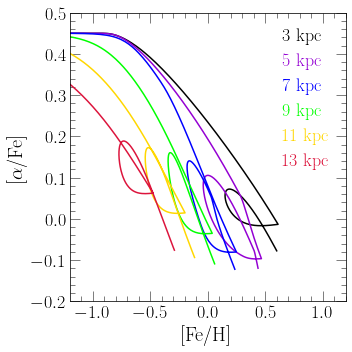

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-0.2, 0.5])

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
labels = ["3 kpc", "5 kpc", "7 kpc", "9 kpc", "11 kpc", "13 kpc"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    xvals = output.zones[zones[i]].history["[fe/h]"]
    yvals = output.zones[zones[i]].history["[o/fe]"]
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": labels[i]
    }
    ax.plot(xvals, yvals, **kwargs) 
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "frameon": False,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
# for ext in ["pdf", "png"]: plt.savefig("./ofe_feh_densitymap/ratiotest_tracks.%s" % (ext))
plt.show()

# What is the mass budget of thick disk stars in this model?

First answer this question based on the mass fraction of stars that form prior to $T = 4$ Gyr, which is when the second infall episode begins.

With the scale radii of the thin and thick disks and their ratio at $R = 0$ reported by [Bland-Hawthorn & Gerhard (2016)](https://osu.zoom.us/j/5545142751?pwd=Skx3a0hlaVg3dkpSSmlsbyt3cDNadz09), the thick disk should comprise 14.7% of the total mass budget:

$$
\begin{align}
M &= \int_0^\infty \Sigma(R) 2\pi R dR
\\
&= 2\pi \Sigma_0 \int_0^\infty R e^{-R/R_s} dR
\\
&= 2\pi \Sigma_0 R_s^2
\end{align}
$$

Applying this to the double-exponential disk profile:

$$
\begin{align}
\frac{M_T}{M_t + M_T} &= \frac{\Sigma_{T,0} R_T^2}{\Sigma_{t,0} R_t^2 + \Sigma_{T,0} R_T^2}
\\
&= \frac{(\Sigma_{T,0}/\Sigma_{t,0}) R_T^2}{R_t^2 + (\Sigma_{T,0}/\Sigma_{t,0}) R_T^2}
\\
&= \frac{(0.27)(2.0~\text{kpc})^2}{(2.5~\text{kpc})^2 + (0.27)(2.0~\text{kpc})^2}
\\
&= 0.147
\end{align}
$$

In [6]:
mstar_t4 = 0
mstar_final = 0
t4_idx = output.zones["zone0"].history["time"].index(4.)
for zone in output.zones.keys():
    mstar_t4 += output.zones[zone].history["mstar"][t4_idx]
    mstar_final += output.zones[zone].history["mstar"][-1]
print("Stellar mass budget formed by T = 4 Gyr: %.2f%%" % (100 * mstar_t4 / mstar_final))

Stellar mass budget formed by T = 4 Gyr: 39.19%


Next, what is the thick disk mass budget if the cut is done based on the separation between high-Ia and low-Ia sequences in the two-process papers (e.g. [Griffith et al. 2021](https://ui.adsabs.harvard.edu/abs/2021ApJ...909...77G/abstract))? Their cut:

$$
\begin{cases}
\text{[Mg/Fe]} \geq 0.185 & \text{[Fe/H]} \leq -0.5
\\
\text{[Mg/Fe]} \geq 0.12 - 0.13\text{[Fe/H]} & -0.5 < \text{[Fe/H]} \leq 0
\\
\text{[Mg/Fe]} \geq 0.12 & \text{[Fe/H]} > 0
\end{cases}
$$

Although I'm using [O/Fe] rather than [Mg/Fe] in these models, for this I'll just assume [O/Mg] = 0. Note that the Griffith et al. (2021) cut does differ from the [Weinberg et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...874..102W/abstract) cut.

In [8]:
def chemical_cut(feh, alphafe):
    r"""
    The Griffith et al. (2021) cut in chemical space.
    
    Parameters
    ----------
    feh : ``float``
        [Fe/H] of a star.
    alphafe : ``float``
        [:math:`\alpha`/Fe] of a star. [O/Fe] in my models.
        
    Returns
    -------
    True if the star belongs to the chemical thick disk.
    False if it belongs to the chemical thin disk.
    """
    if feh <= -0.5:
        return alphafe >= 0.185
    elif feh <= 0:
        return alphafe >= 0.12 - 0.13 * feh
    else:
        return alphafe >= 0.12
    
# print(output.name)
thin_disk_mass = 0
thick_disk_mass = 0
feh = output.stars["[fe/h]"]
ofe = output.stars["[o/fe]"]
mass = output.stars["mass"]
for i in range(output.stars.size[0]):
    if chemical_cut(feh[i], ofe[i]):
        thick_disk_mass += mass[i]
    else:
        thin_disk_mass += mass[i]
#     sys.stdout.write("\r%d of %d" % (i, output.stars.size[0]))
# sys.stdout.write("\n")
# for i in range(output.stars.size[0]):
#     if chemical_cut(output.stars["[fe/h]"][i], output.stars["[o/fe]"][i]):
#         thick_disk_mass += output.stars["mass"][i]
#     else:
#         thin_disk_mass += output.stars["mass"][i]
#     pbar.update(i + 1)
            
print("Thick disk mass budget from chemical cut: %.2f%%" % (
    100 * thick_disk_mass / (thin_disk_mass + thick_disk_mass)))

Thick disk mass budget from chemical cut: 28.52%
